In [9]:
!pip3 install platypus
!pip3 install ema_workbench platypus-opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import sys
import pandas as pd
from ema_workbench.analysis.parcoords import ParallelAxes, get_limits
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
sys.path.append('..')

In [8]:
import rbf_functions

ImportError: ignored

In [ ]:
rbfs = [rbf_functions.original_rbf,
        rbf_functions.squared_exponential_rbf,
        rbf_functions.inverse_quadratic_rbf,
        rbf_functions.inverse_multiquadric_rbf,
        rbf_functions.exponential_rbf,
        rbf_functions.matern32_rbf,
        rbf_functions.matern52_rbf,
       ]

pareto_sets = {}
for entry in rbfs:
    name = entry.__name__
    output_dir = f"../refsets/"
    results = pd.read_csv(output_dir + name+ '_refset.csv')
    results['environment'] = 1 - results['environment']
    
    pareto_sets[name] = results

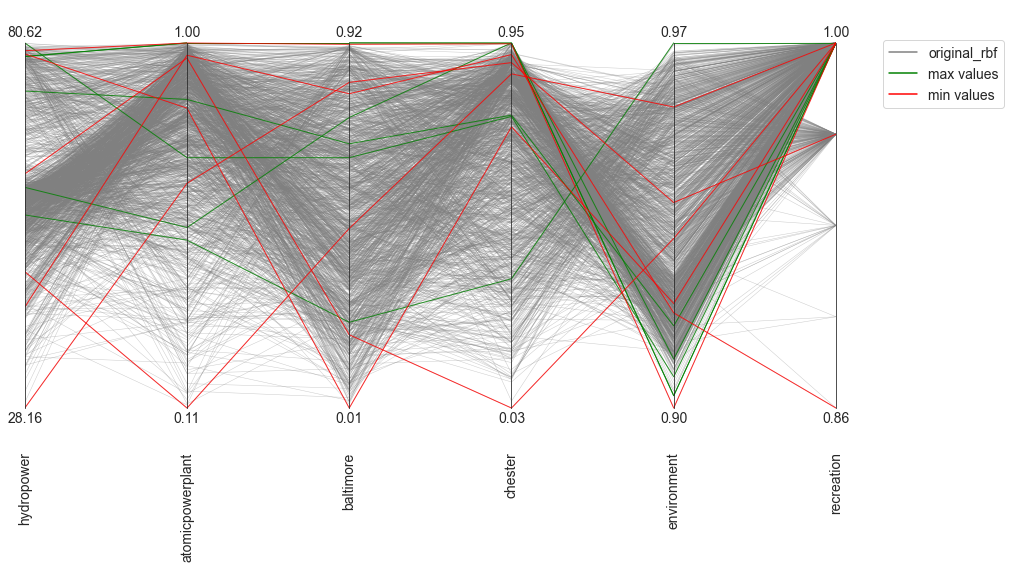

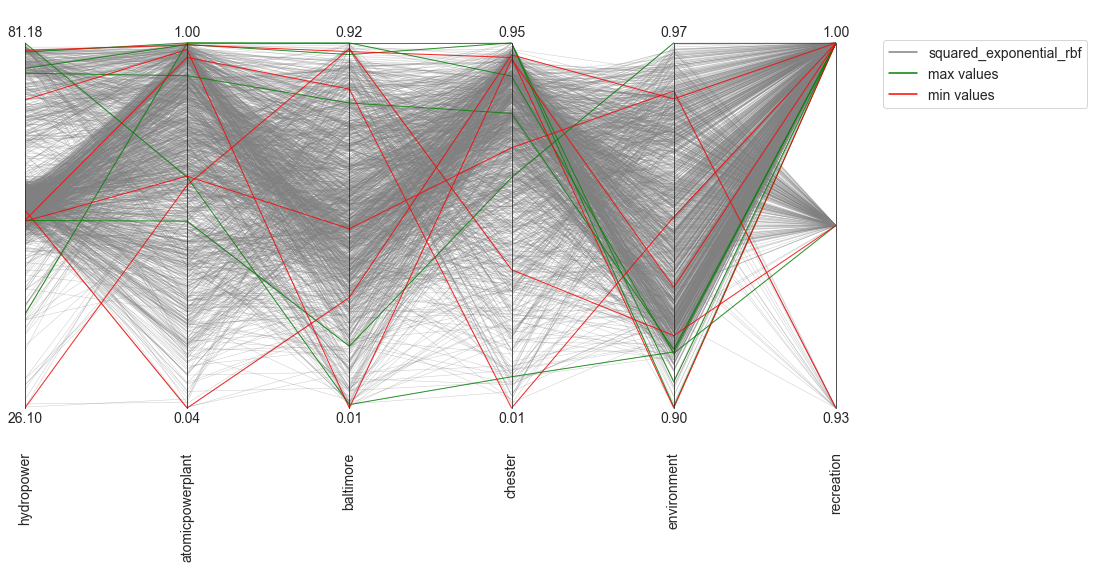

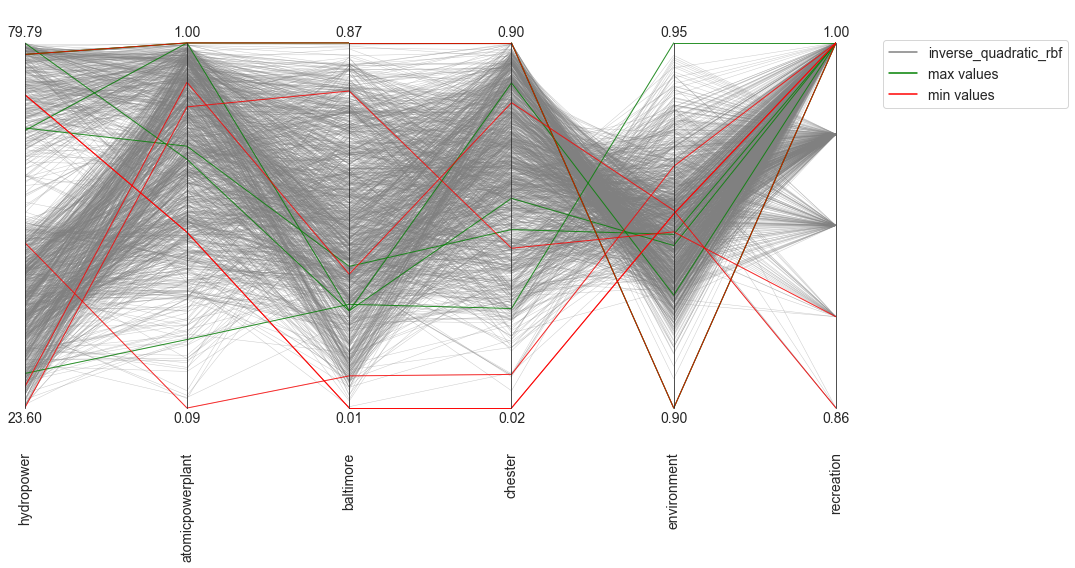

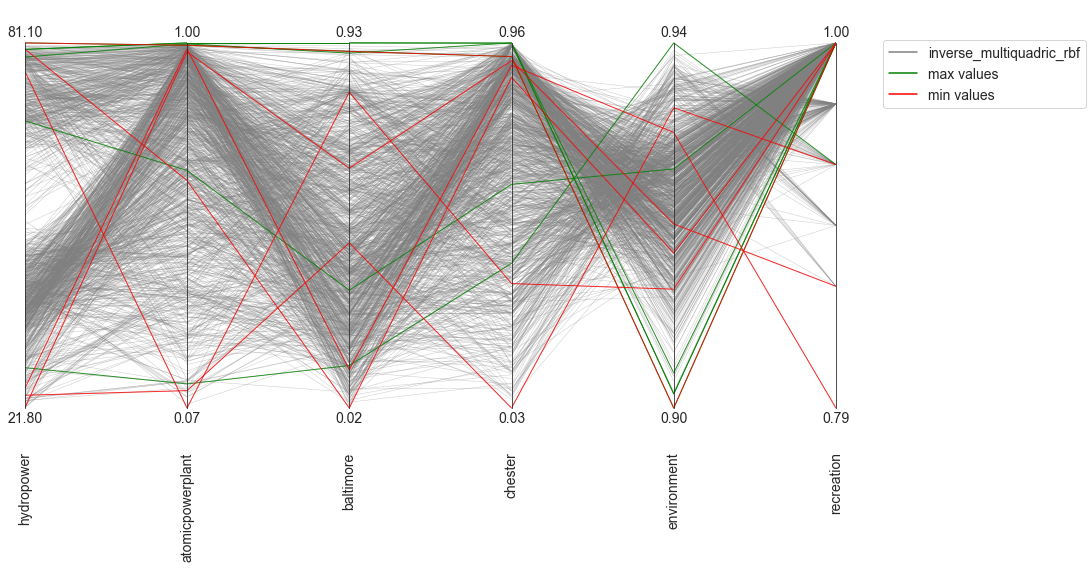

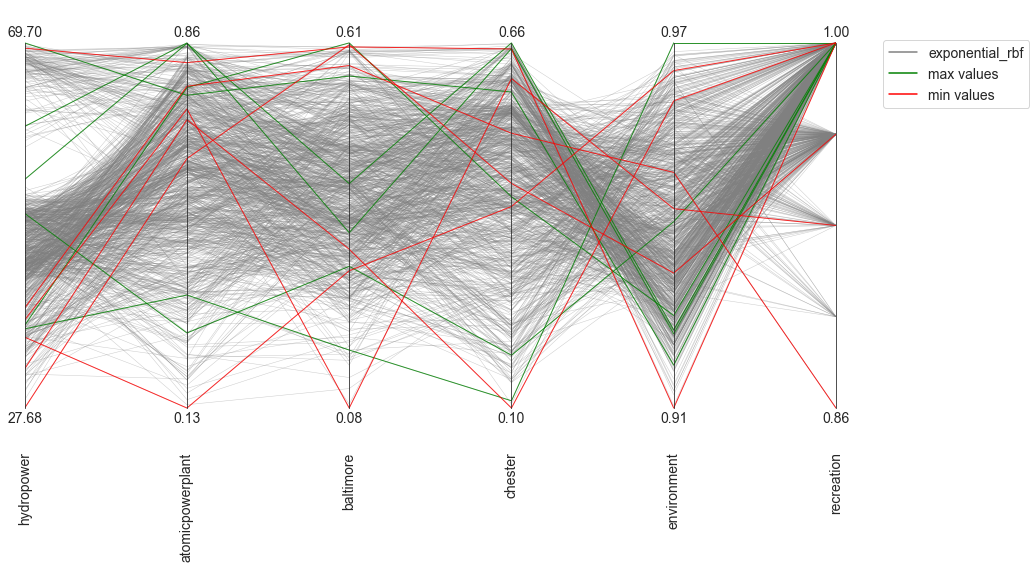

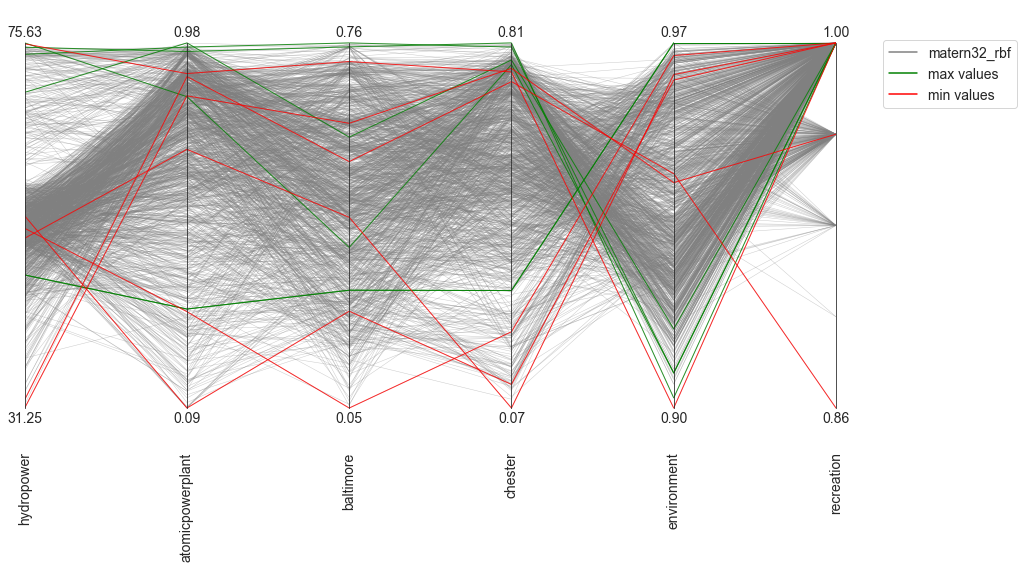

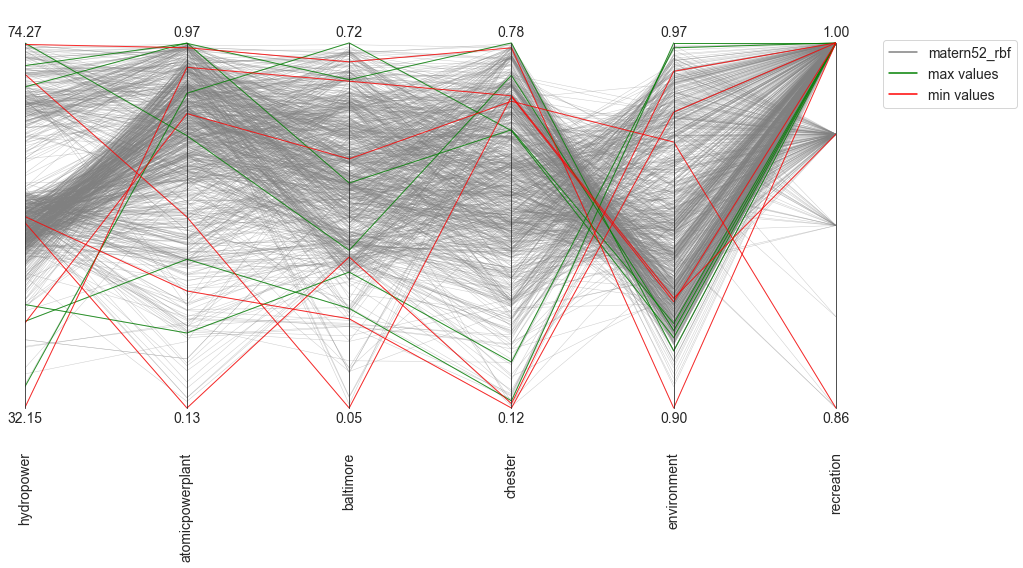

In [ ]:
for entry in rbfs:
    name = entry.__name__
    df_rbf = pareto_sets[name].copy()
    # print(df_se.max())
    df_max = pd.DataFrame(columns=df_rbf.columns)
    df_min = pd.DataFrame(columns=df_rbf.columns)
    for i in df_rbf.idxmax():
        df_max = df_max.append(df_rbf.loc[i])
    for i in df_rbf.idxmin():
        df_min= df_min.append(df_rbf.loc[i])
        
    limits = get_limits(df_rbf)
    axes = ParallelAxes(limits)    
    axes.plot(df_rbf, label=name, lw=0.5, color='grey', alpha=0.4)
    axes.plot(df_max, label='max values', lw=1, color='green', alpha=0.8)
    axes.plot(df_min, label='min values', lw=1, color='red', alpha=0.8)
    axes.legend()
#     plt.savefig(f'figs/{name}/{name}_parcoords.jpg')
    plt.show()

In [ ]:
df_se = pareto_sets['squared_exponential_rbf'].copy()
# print(df_se.max())
df_max = pd.DataFrame(columns=df_se.columns)
df_min = pd.DataFrame(columns=df_se.columns)
for i in df_se.idxmax():
    df_max = df_max.append(df_se.loc[i])
for i in df_se.idxmin():
    df_min= df_min.append(df_se.loc[i])

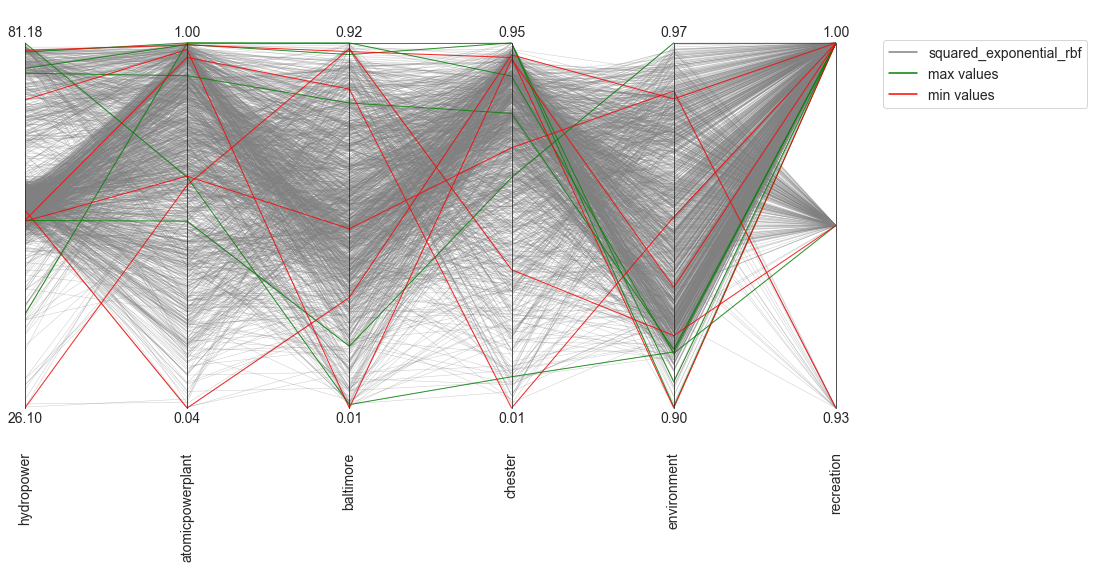

In [ ]:
limits = get_limits(df_se)
axes = ParallelAxes(limits)    
axes.plot(df_se, label='squared_exponential_rbf', lw=0.5, color='grey', alpha=0.4)
axes.plot(df_max, label='max values', lw=1, color='green', alpha=0.8)
# axes.plot(df_min, label='min values', lw=1, color='red', alpha=0.8)
axes.legend()
plt.show()

In [ ]:
df_rbf = pareto_sets[name].copy()
# cols = df_rbf.columns.to_list()
# cols.append("index")
df_max = pd.DataFrame(columns=cols)
df_idxmax = df_rbf.idxmax()

for i in df_rbf.idxmax().items():
#     print(df_rbf.loc[i[1]])
#     label=i[0]
#     ser = pd.Series(data=, index=['a', 'b', 'c'])
#     df_max = df_max.append(df_rbf.loc[i[1]])
#     df_max.set_index(i[0], inplace=True)

In [ ]:
# df_rbf[df_rbf['recreation']==1]
# df_rbf.where(df_rbf.eq(df_rbf.max(), axis=1)).stack()
coll = 'hydropower'
df_temp = df_rbf[df_rbf[coll] == df_rbf[coll].max()]

In [ ]:
df_max = pd.DataFrame(columns=df_rbf.columns)
df_temp['index'] = "recreation"
df_max = df_max.append(df_temp)
df_max.set_index("index")
# df_max

<ipython-input-119-1e126623a0d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['index'] = "recreation"


hydropower  atomicpowerplant  baltimore   chester  environment  \
index                                                                        
recreation   74.269669          0.754325   0.340534  0.722054     0.916717   

            recreation  
index                   
recreation         1.0

In [ ]:
df_max = pd.DataFrame(columns=df_rbf.columns)
# for i in df_max:
    
if len(df_temp) > 1:
    df_temp.loc[:, 'hydropower'] = df_temp['hydropower'].div(100)
    maxval = df_temp.sum(axis=1).idxmax()
    print(df_temp.iloc[maxval])

AttributeError: 'float' object has no attribute 'div'

In [ ]:
df_rbf.idxmax()


hydropower          251
atomicpowerplant    539
baltimore           621
chester             556
environment         152
recreation            0
dtype: int64

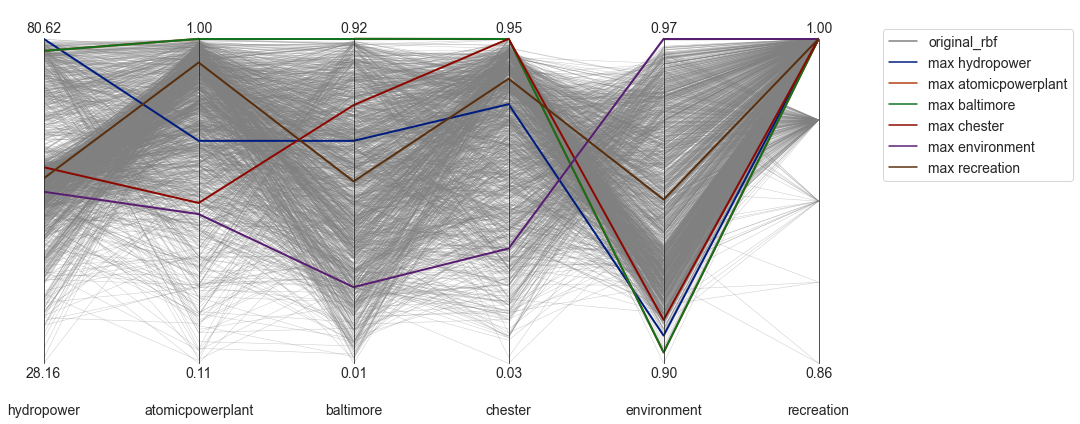

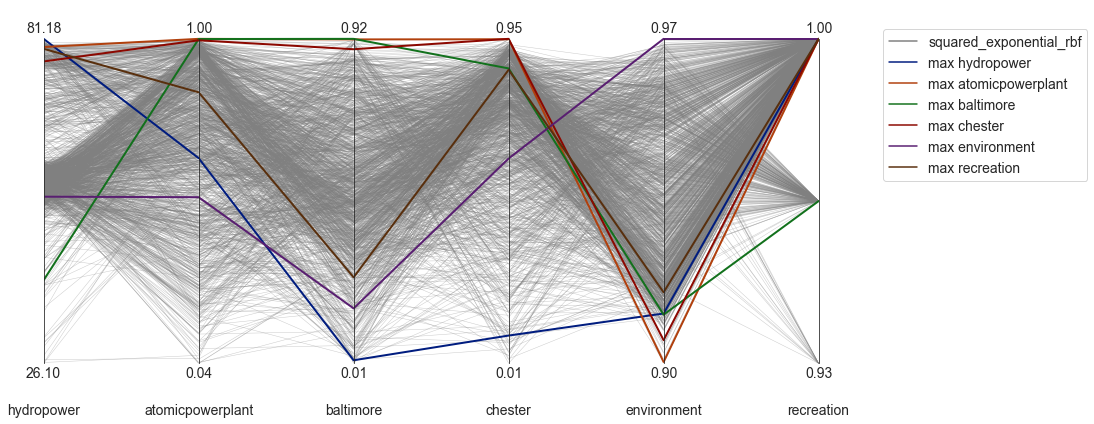

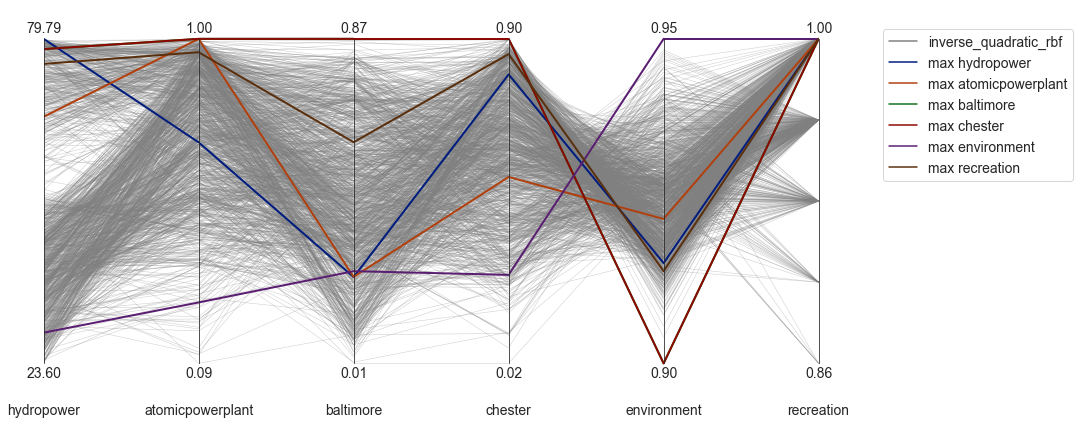

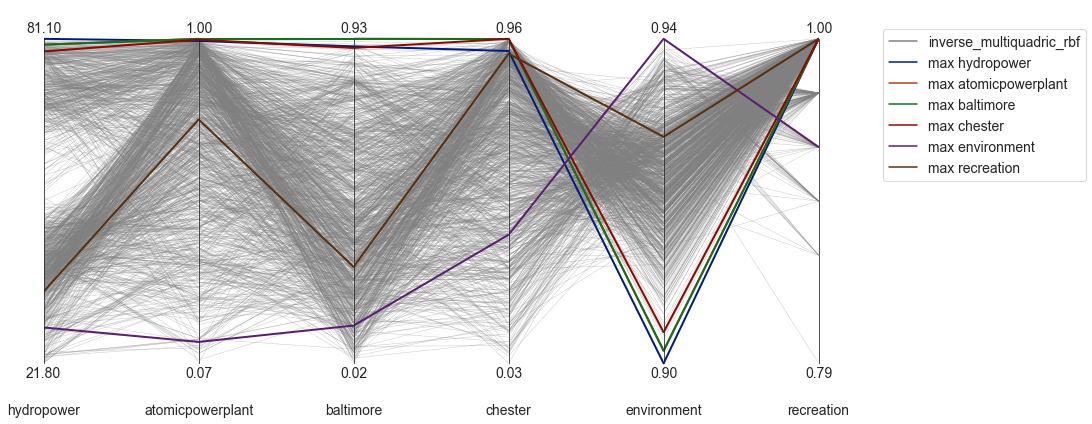

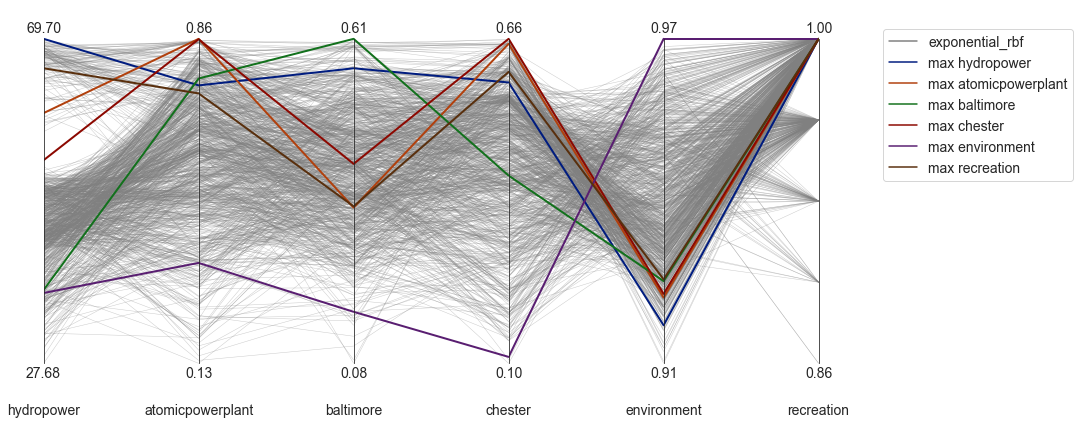

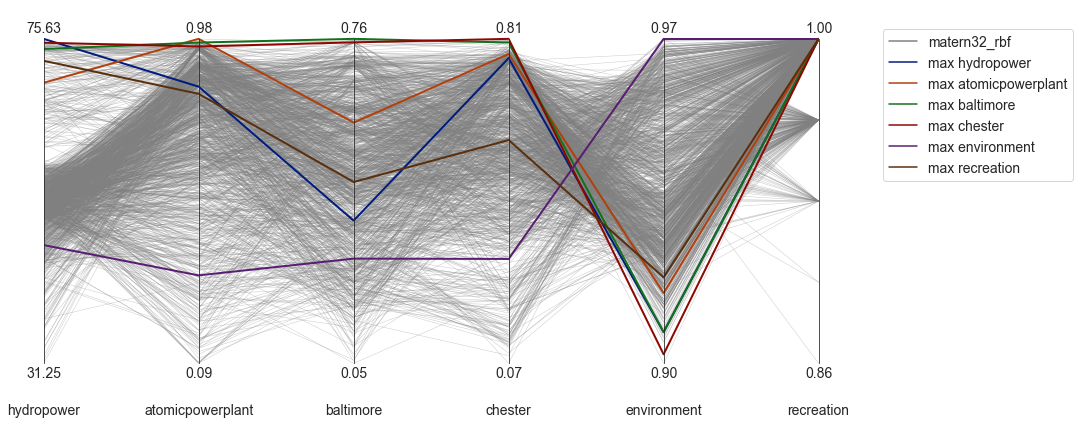

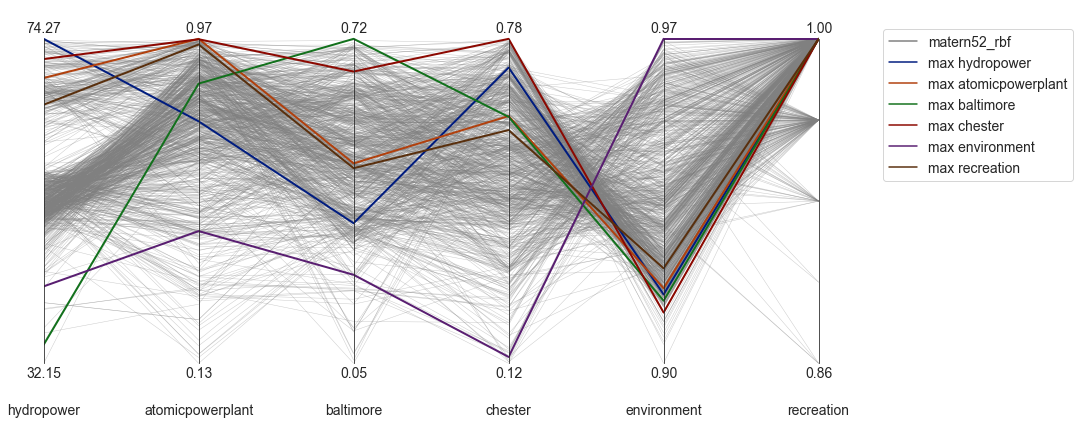

In [ ]:
pd.options.mode.chained_assignment = None
plt.rcParams['figure.figsize'] = [12, 6]
for entry in rbfs:
    name = entry.__name__
    df_rbf = pareto_sets[name].copy()
    cols = list(df_rbf.columns)
    cols.append("index")
    df_max = pd.DataFrame(columns=cols)
    for i in df_max.columns[0:-1]:
        df_temp = df_rbf[df_rbf[i] == df_rbf[i].max()].reset_index()
        if len(df_temp) > 1:
            df_temp.loc[:, 'hydropower'] = df_temp['hydropower'].div(100)
            maxval = df_temp.sum(axis=1).idxmax()
            df_temp.loc[:, 'hydropower'] = df_temp['hydropower'].mul(100)
            df_temp2 = df_temp.iloc[maxval]
            df_temp2['index'] = i
            df_max = df_max.append(df_temp2)
        else:
            df_temp['index'] = i
            df_max = df_max.append(df_temp)

    df_max = df_max.set_index("index")

    limits = get_limits(df_rbf)
    axes = ParallelAxes(limits, rot=0)    
    axes.plot(df_rbf, label=name, lw=0.5, color='grey', alpha=0.4)

    for j, c in zip(df_max.iterrows(), sns.color_palette('dark')):
        axes.plot(j[1], label=f"max {j[0]}", color=c, lw=2, alpha=1)

    axes.legend()
    plt.savefig(f'figs/{name}/{name}_parcoords.jpg')
    plt.show()

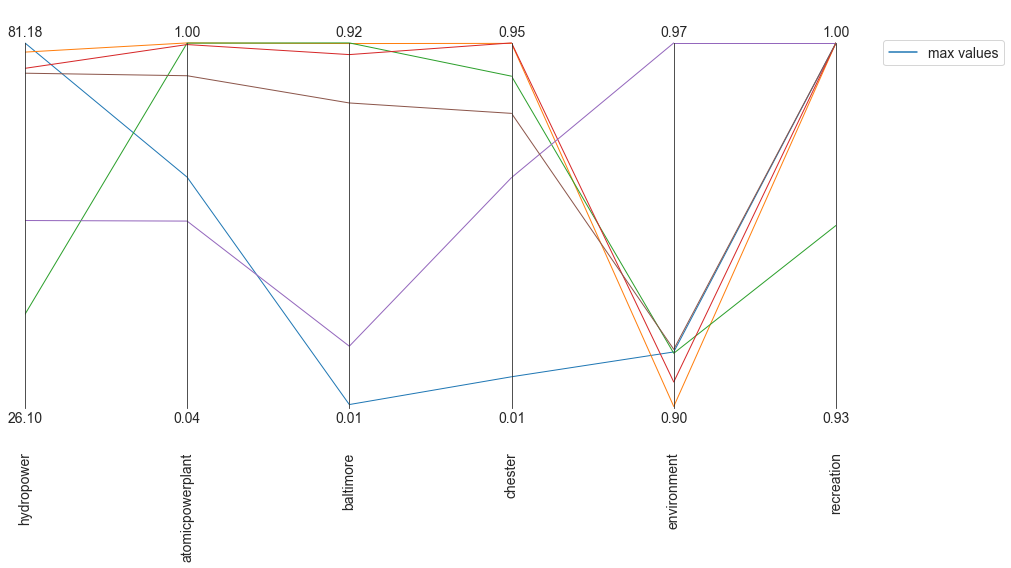

In [ ]:
limits = get_limits(df_se)
axes = ParallelAxes(limits)    
axes.plot(df_max, label='max values', lw=1, alpha=1)
axes.legend()
plt.show()

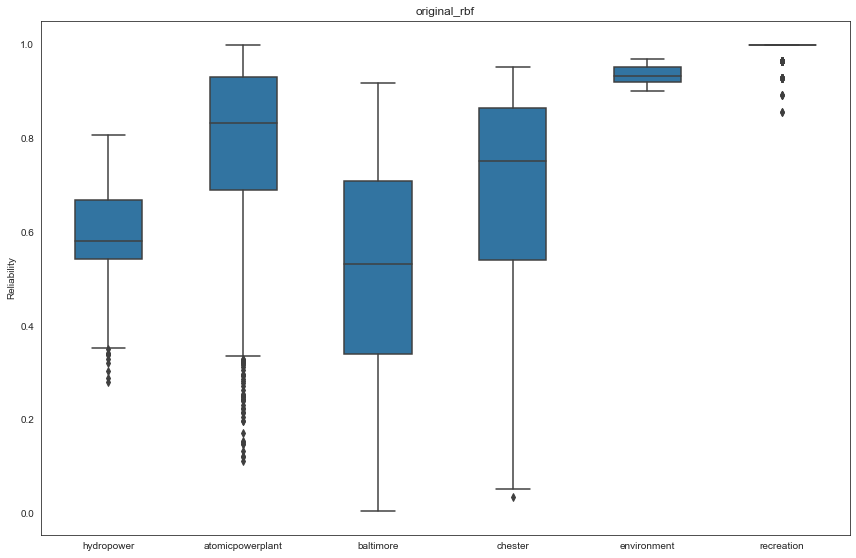

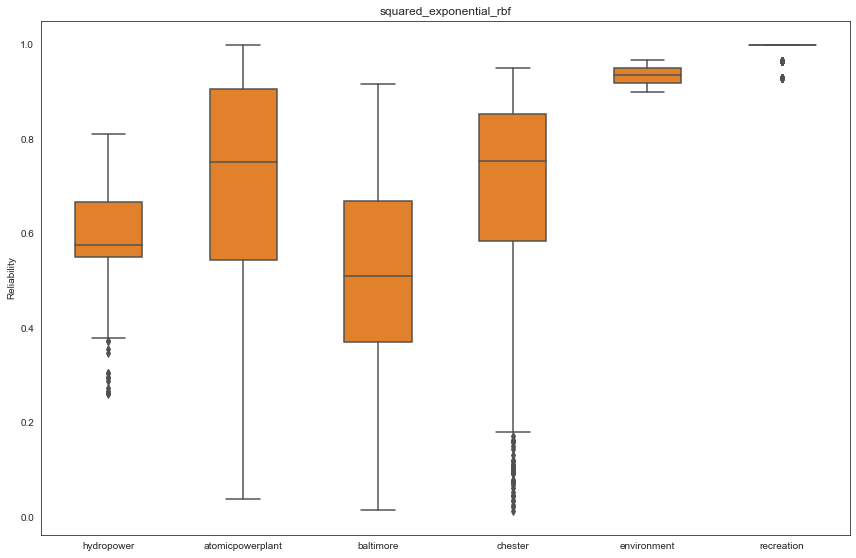

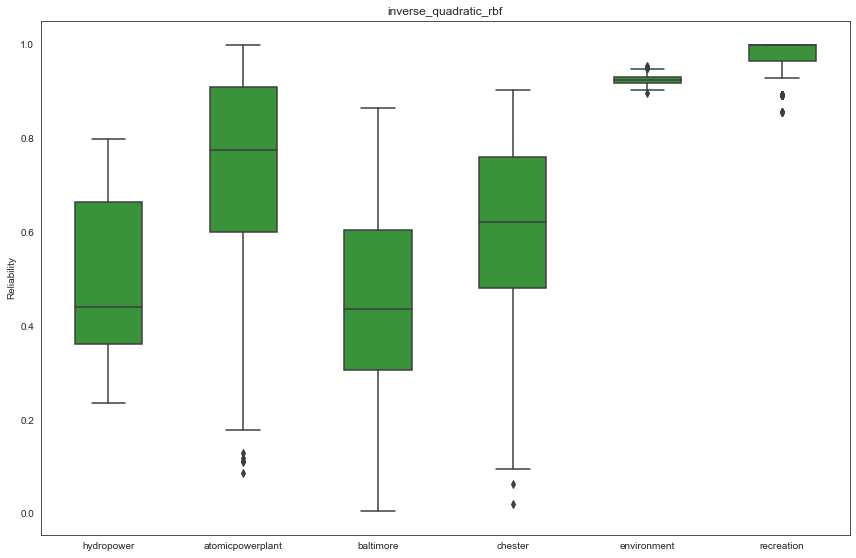

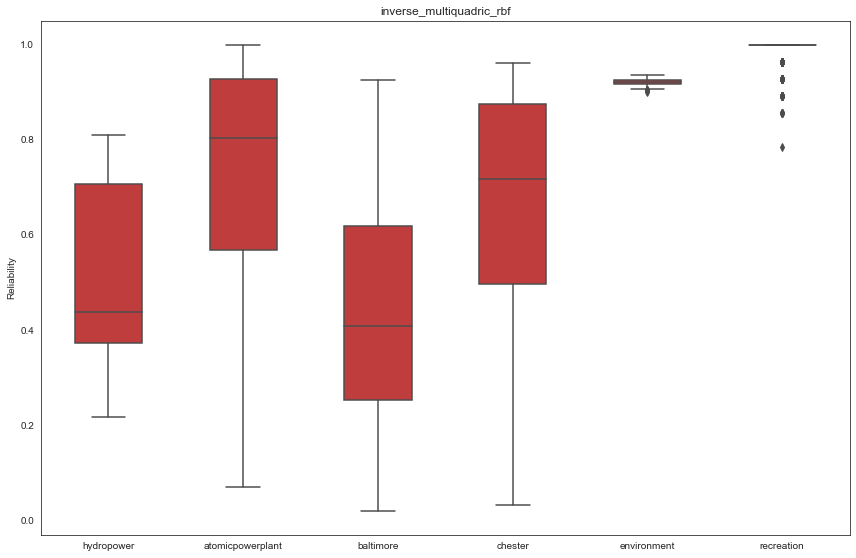

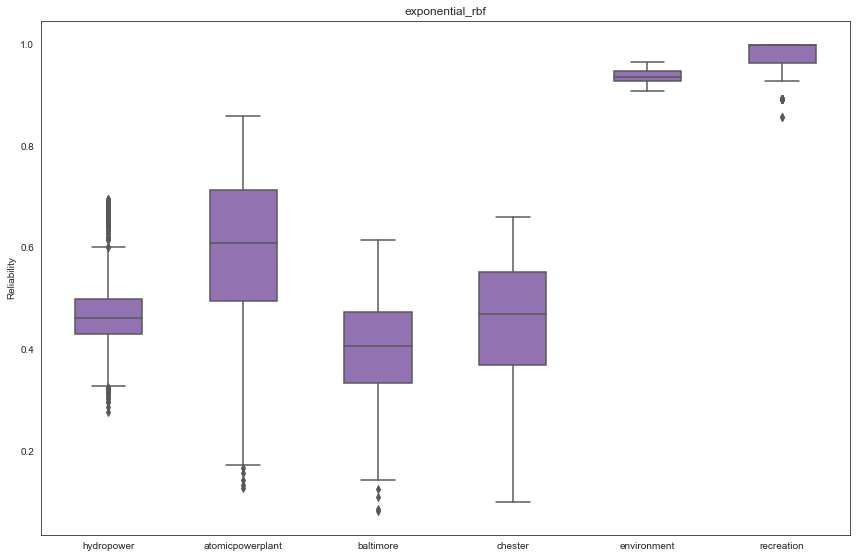

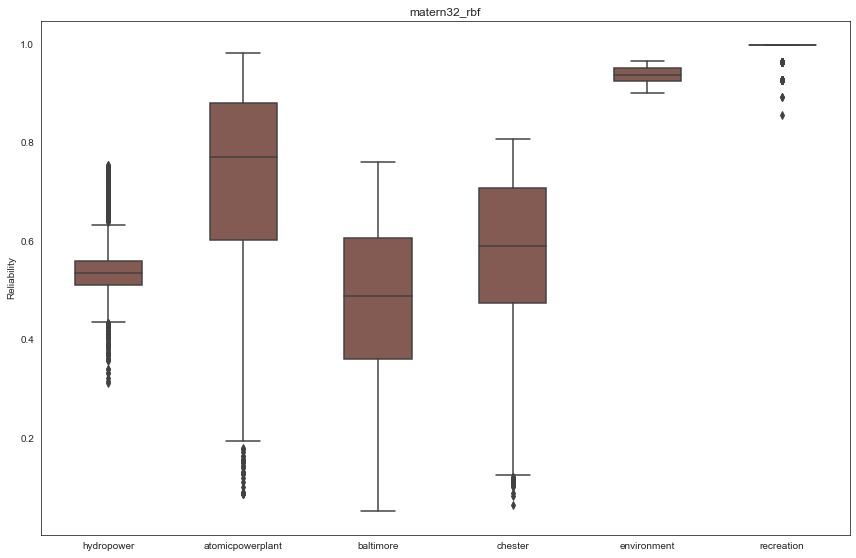

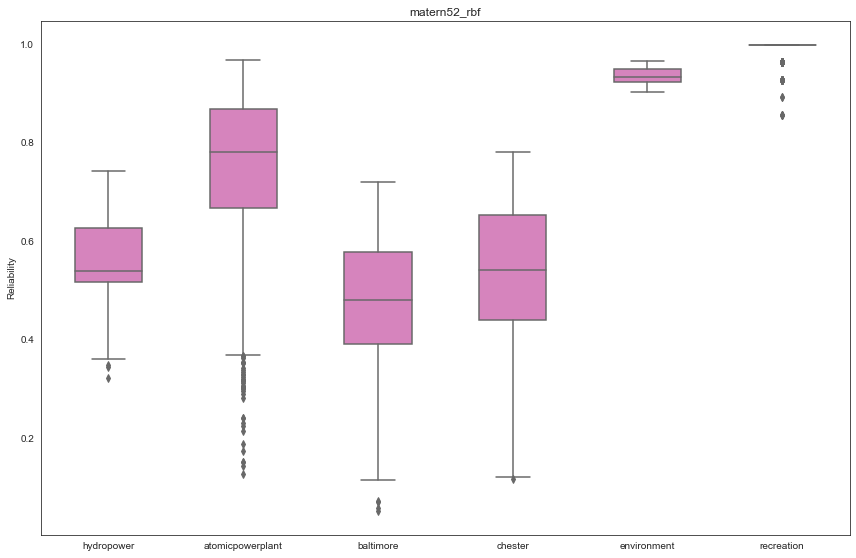

In [ ]:
import seaborn as sns

# sns.color_palette()
# for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):

for entry, c in zip(rbfs, sns.color_palette()):
    name = entry.__name__
    boxp = pareto_sets[name].copy()
    boxp['hydropower'] = boxp['hydropower']/100
    sns.boxplot(     data=boxp, 
                     width=0.5,
                     color=c)
    plt.title(name)
    plt.suptitle("")
    plt.xlabel("")
    plt.ylabel("Reliability")
    plt.tight_layout()
    plt.savefig(f'figs/{name}/{name}_boxplot.jpg')
    plt.show()